<span style="color:red">
Disclaimer: Do not share this Python notebook to third parties <br>
Atencao: Nao compartilhe esse Python notebook com outras pessoas </span>
<h1><b>Networks in socio-economic systems </b></h1>
<h3>Prof Luis E C Rocha - luis.rocha@ugent.be</h3>
<h4>Dept of Economics and Dept of Physics and Astronomy</h4>
<h4>Ghent University, Belgium</h4>
<h4><b>Version:</b> Federal University of Uberlandia, Brazil - November 2023 </h4>

<h1><b>Lab 2a: Intro to Pandas and Degree Analysis in Python</b></h1>

<h3>Summary:</h3> The goal is to get a brief introduction to Pandas, a library for general data handling in Python, followed by a brief introduction to networkx package. We will also see how to create a network, add attributes to nodes, make basic degree analysis, and visualise a network.

<h2><b>(0:00-1:15h) Part 1 </b></h2>


<h2><b>1.</b> (0:00-0:30h) Pandas: the very basics</h2>

Pandas is a module to work with data. It allows us to create and manipulate a data set more easily, pretty much like an Excel spreadsheet or an ordinary table.
<ul>
    <li> For more info, visit: https://pandas.pydata.org </li>
    <li> Data files used in this class can be found on https://users.ugent.be/~lcorread/courses/week2/ </li>
</ul>


<h4><b>1.1</b> Create a pandas dataframe</h4>


In [4]:
# First import Pandas module

import pandas as pd

# Let us first create a dataframe. There are different ways of creating a dataframe

# Method 1: Create a dataframe using 3 lists

names = ['Luis','Hans','Marijke','Koen','Nele']
births = [1981, 1988, 1968, 1970, 1990]
country = ['Brazil', 'Germany', 'Belgium', 'Belgium', 'France']

# combine the three lists into a single list using the built-in function "zip"
PersonalData = list(zip(names, births, country))

#print(PersonalData)
PersonalData


[('Luis', 1981, 'Brazil'),
 ('Hans', 1988, 'Germany'),
 ('Marijke', 1968, 'Belgium'),
 ('Koen', 1970, 'Belgium'),
 ('Nele', 1990, 'France')]

In [5]:
# Create a pandas dataframe from this list (of lists). The columns option is optional

df_students = pd.DataFrame(data = PersonalData, columns=['Names', 'Births', 'Country'])

print(df_students)


     Names  Births  Country
0     Luis    1981   Brazil
1     Hans    1988  Germany
2  Marijke    1968  Belgium
3     Koen    1970  Belgium
4     Nele    1990   France


In [6]:
# another way to show what is in your df_student dataframe

df_students


,Names,Births,Country
0,Luis,1981,Brazil
1,Hans,1988,Germany
2,Marijke,1968,Belgium
3,Koen,1970,Belgium
4,Nele,1990,France


In [7]:
# You can save this dataframe in a .csv text file
# index means the "number" (i.e. index) of the row. header means the "header" of the dataframe. 
# "sep" means how the columns will be separated in the text file

df_students.to_csv('./data/week2_students.csv', index = False, header = False, sep = ',')

# if you choose "True" above, row index and column name will also be saved
#df_students.to_csv('./data/week2_students.csv', index = True, header = True)


In [8]:
# Method 2: Create a dataframe by reading data directly from a file

# Note that in this data file, the columns are separated by a simple space
df = pd.read_csv('./data/week2_pandas.csv', sep = ' ')
print(df)


   a  b  weight
0  0  1    2.50
1  0  2    3.00
2  0  3    3.50
3  0  4    1.00
4  0  5    1.50
5  1  3    2.00
6  3  5    3.33
7  4  5    1.00


In [9]:
# Method 3: Create a dictionary and then convert to a dataframe
# A dictionary is a collection (key:value pairs) which is ordered (from Python 3.7), changeable and does not allow duplicates

dict_brics = {'country': ['Brazil', 'Russia', 'India', 'China', 'South Africa'],
              'capital': ['Brasilia', 'Moscow', 'New Delhi', 'Beijing', 'Pretoria'],
              'area': [8.516, 17.10, 3.286, 9.597, 1.221],
              'population': [200.4, 143.5, 1252, 1357, 52.98] }

brics = pd.DataFrame(dict_brics)

print(brics)


        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Delhi   3.286     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98


<h4><b>1.2</b> Manipulate a pandas dataframe</h4>


In [10]:
# Change the order of the columns

# this routine generates a list with desired order, then, extract it from the dataframe brics AND add the result back to brics
brics = brics[['capital', 'country', 'area', 'population']]

print(brics)


     capital       country    area  population
0   Brasilia        Brazil   8.516      200.40
1     Moscow        Russia  17.100      143.50
2  New Delhi         India   3.286     1252.00
3    Beijing         China   9.597     1357.00
4   Pretoria  South Africa   1.221       52.98


In [11]:
# Change the order of rows and reorder indexes

# change the order of the rows
brics = brics.reindex([0, 3, 2, 1, 4])

# replaces the existing indexes by ordered indexes, i.e. "resets" the order of the indexes
brics = brics.reset_index(drop=True)

print(brics)


     capital       country    area  population
0   Brasilia        Brazil   8.516      200.40
1    Beijing         China   9.597     1357.00
2  New Delhi         India   3.286     1252.00
3     Moscow        Russia  17.100      143.50
4   Pretoria  South Africa   1.221       52.98


In [12]:
# Rename columns

# rename one or more columns
brics.rename(columns={'country': 'LAND', 'population': 'POP'}, inplace=True)

print(brics)


     capital          LAND    area      POP
0   Brasilia        Brazil   8.516   200.40
1    Beijing         China   9.597  1357.00
2  New Delhi         India   3.286  1252.00
3     Moscow        Russia  17.100   143.50
4   Pretoria  South Africa   1.221    52.98


In [13]:
# Rename rows

# rename one or more indexes
brics.rename(index={0: 'BR', 1: 'CH'}, inplace=True)

print(brics)


      capital          LAND    area      POP
BR   Brasilia        Brazil   8.516   200.40
CH    Beijing         China   9.597  1357.00
2   New Delhi         India   3.286  1252.00
3      Moscow        Russia  17.100   143.50
4    Pretoria  South Africa   1.221    52.98


In [14]:
# Order rows according to values in a specific column

brics = brics.sort_values(by = ['area'])
brics = brics.reset_index(drop = True)       # this will bring the indexes back (to replace the row label/name)

print(brics)


     capital          LAND    area      POP
0   Pretoria  South Africa   1.221    52.98
1  New Delhi         India   3.286  1252.00
2   Brasilia        Brazil   8.516   200.40
3    Beijing         China   9.597  1357.00
4     Moscow        Russia  17.100   143.50


In [15]:
# Convert a dataframe to a list

# to convert only the column "area" to a list
list1 = brics['area'].values.tolist()   # Convert only the column "area" to a list

print(list1)


[1.221, 3.286, 8.516, 9.597, 17.1]


In [16]:
# Convert the whole dataframe to a list of lists

list2 = brics.values.tolist()

# returns a list containing only the 1st row
print(list2[0])


['Pretoria', 'South Africa', 1.221, 52.98]


In [17]:
# Transpose a dataframe

brics_transposed = brics.transpose()
print(brics_transposed)


                    0          1         2        3       4
capital      Pretoria  New Delhi  Brasilia  Beijing  Moscow
LAND     South Africa      India    Brazil    China  Russia
area            1.221      3.286     8.516    9.597    17.1
POP             52.98     1252.0     200.4   1357.0   143.5


In [18]:
# Convert the whole dataframe to a list of lists

list3 = brics_transposed.values.tolist()

# returns a list containing only the 1st row
# Note that this is the 1st column of the original dataframe "brics" because we took the transpose first
print(list3[0])


['Pretoria', 'New Delhi', 'Brasilia', 'Beijing', 'Moscow']


In [19]:
# another method to extra full rows or full columns from a dataframe
print(brics)

# return all columns of a given row as a list
brics.iloc[2, :].values.flatten().tolist()

# return all rows of a given column as a list
#brics.iloc[:, 2].values.flatten().tolist()



     capital          LAND    area      POP
0   Pretoria  South Africa   1.221    52.98
1  New Delhi         India   3.286  1252.00
2   Brasilia        Brazil   8.516   200.40
3    Beijing         China   9.597  1357.00
4     Moscow        Russia  17.100   143.50


['Brasilia', 'Brazil', 8.516, 200.4]

In [20]:
# Show some basic statistics

# only works with numerical entries/columns
brics.describe()


,area,POP
count,5.000000,5.000000
mean,7.944000,601.176000
std,6.200557,645.261454
min,1.221000,52.980000
25%,3.286000,143.500000
50%,8.516000,200.400000
75%,9.597000,1252.000000
max,17.100000,1357.000000


<h4><b>1.3</b> Mathematical operations with dataframes</h4>


In [21]:
# Read a new file into a dataframe

df = pd.read_csv('./data/week2_pandas.csv', sep=' ')
print(df)


   a  b  weight
0  0  1    2.50
1  0  2    3.00
2  0  3    3.50
3  0  4    1.00
4  0  5    1.50
5  1  3    2.00
6  3  5    3.33
7  4  5    1.00


In [24]:
# Select only specific rows or columns to work

# Select columns 0 and 1, and all rows
# "iloc" means "integer location", i.e. specify the index of the column instead of the label/name
df2 = df.iloc[:,1:3]   

# Select rows 1 and 2, and all columns
#df2 = df.iloc[0:2,:]

# if you use [0:,:], all rows from 2 until the end "0:", and all columns ":", are selected
#df2 = df.iloc[2:,:]

# ================== Alternative ===================
# Select two specific columns by column label/name
#df2 = df[['a','b']]

print(df2)


   b  weight
0  1    2.50
1  2    3.00
2  3    3.50
3  4    1.00
4  5    1.50
5  3    2.00
6  5    3.33
7  5    1.00


In [23]:
# test what happens with the following routine

df3 = df.iloc[:,2].sort_values()

# compare with
#df3 = df.sort_values(by = ['weight'])

print(df)
print(df3)


   a  b  weight
0  0  1    2.50
1  0  2    3.00
2  0  3    3.50
3  0  4    1.00
4  0  5    1.50
5  1  3    2.00
6  3  5    3.33
7  4  5    1.00
3    1.00
7    1.00
4    1.50
5    2.00
0    2.50
1    3.00
6    3.33
2    3.50
Name: weight, dtype: float64


In [178]:
# Make operations using the columns or the rows of the dataframe
# you can do mathematical operations such as: +, -, *, /

# division using iloc
df.iloc[:, 2] / df.iloc[:, 1]                 # iloc -> integer location

# ======= alternative ====================
# division using the columns' name
#df.loc[:, 'weight'] / df.loc[:, 'b']         # loc  -> label location
#df['weight'] / df['b']                       # column name


0    2.500000
1    1.500000
2    1.166667
3    0.250000
4    0.300000
5    0.666667
6    0.666000
7    0.200000
dtype: float64

In [179]:
# Row sum: Sum all values in each row (only numerical values)

print( df.iloc[:, 1:3].sum(axis = 1) )     # sum the columns of each row : axis=1 (horizontal sum) means that for each row, all x values will be summed


0    3.50
1    5.00
2    6.50
3    5.00
4    6.50
5    5.00
6    8.33
7    6.00
dtype: float64


In [180]:
# Column sum: Sum all values in each column (only numerical values)

print( df.iloc[:, 0:3].sum(axis = 0) )     # sum the rows of each column : axis=0 (vertical sum) means that for each column, all y values will be summed


a          8.00
b         28.00
weight    17.83
dtype: float64


In [181]:
# Row mean: Mean of all values in each row (only numerical)

# mean using iloc
df.iloc[:, 1:3].mean(axis = 1)             # same as before, axis=1 (horizontal) mean of all columns for each rows
# standard deviation using iloc
#df.iloc[:, 1:3].std(axis = 1)

# ========= alternative =========================
# mean using the columns name - 1st extract the specified columns, and then takes the mean over all columns
#df[ ['b', 'weight'] ].mean(axis = 1)  # mean of each row


0    1.750
1    2.500
2    3.250
3    2.500
4    3.250
5    2.500
6    4.165
7    3.000
dtype: float64

In [182]:
# Column mean: Mean of all values in each column (only numerical)

# mean using iloc
df.iloc[:, 1:3].mean(axis = 0)
# standard deviation using iloc
#df.iloc[:, 1:3].std(axis = 0)

# ========= alternative =========================
# mean using the columns name - 1st extract the specified columns, and then takes the mean over all rows
#df[ ['b', 'weight'] ].mean(axis = 0)  # mean of each column


b         3.50000
weight    2.22875
dtype: float64

In [183]:
# Pearson correlation between two columns

df.corr(method ='pearson') # replace 'pearson' by 'spearman' for the spearman correlation


,a,b,weight
a,1.000000,0.589256,-0.162758
b,0.589256,1.000000,-0.399210
weight,-0.162758,-0.399210,1.000000


<h3><b>Exercise 1:</b> Dataframe operations</h3>

Read a data file in .csv format and calculate the GDP per-capita
<ul>
    <li> Read the file "week2_GDP.csv" </li>
    <ul>
        <li> (tip) first open the file in an editor and see the text format </li>
    </ul>
    <li> Calculate the GDP per-capita, $GDP_c$ </li>
    <ul>
        <li> Note that $GDP_c = \dfrac{GDP}{Population}$ </li>
    </ul>
    <li> Add $GDP_c$ to the original dataframe </li>
    <ul>
        <li> (tip) use the function: "pd.concat([df1, df2], axis = 1)". It adds "df2" to "df1" as a new column </li>
    </ul>
    <li> Rank countries by $GDP_c$ </li>
    <li> Save the new dataframe in a new file </li>
    <li> (homework) plot $GDP_c$ vs country population $P$ </li>
</ul>


   country             GDP  population          GDPc
0    India   2650725335364  1338676785   1980.108541
1    China  12237700479375  1421021791   8611.902053
2    Japan   4872415104315   127502725  38214.203691
3  Belgium    494763551891    11419748  43325.260057
4  Germany   3693204332230    82658409  44680.322025
5       US  19485394000000   325084756  59939.426997


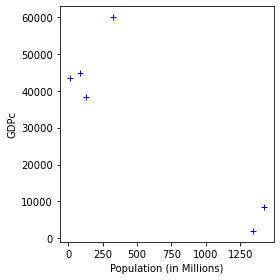

In [224]:
# Solution

import pandas as pd
import matplotlib.pyplot as plt

# Read the file
countries = pd.read_csv('./data/week2_GDP.csv', sep=' ')

# Calculate the GDP per-capita
df_temp = countries.loc[:,'GDP'] / countries.loc[:,'population']
# df_temp.rename('GDPc') # -> to rename the label of the series "df2" : one-dimensional dataframe is called series

# Concatenate (join) the dataframe df2 to df1. *Technically df2 is a series
new_countries = pd.concat([countries, df_temp], axis = 1)#, join='inner')

# Add a name to the column GDPc
new_countries.rename(columns={0: 'GDPc'}, inplace=True)

# Sort values in order of GDPc
results = new_countries.sort_values(by = ['GDPc'])

# Set the indexes in ascending order
results.reset_index(drop = True, inplace = True)

# Save the new dataframe to a file
results.to_csv('./data/week2_GDPc.csv', index = False, header = True)

print(results)

# Plot the results
# Initialise the figure environment
plt.figure(figsize=(4,4), tight_layout=True)

plt.ylabel('GDPc')
plt.xlabel('Population (in Millions)')
plt.plot(results.iloc[:,2]/1000000, results.iloc[:,3], 'b+')

plt.show()


<h2><b>2.</b> (0:30-1:15h) NetworkX: the very basics</h2>

There is a variety of modules/libraries for network analysis, the most popular are:
<ul>
    <li> networkx - https://networkx.github.io  -> most popular but implemented in Python and thus slower than other modules for large graphs. It is OK for smaller graphs (e.g. $N < 5000-10000$, also depends on the number of links and the memory of your computer) </li>
    <li> igraph - https://igraph.org    -> also for R</li>
    <li> graph-tool - https://graph-tool.skewed.de </li>
    <li> SNAP - https://snap.stanford.edu </li>
    <li> NetworKit https://networkit.github.io </li>
</ul>
<ul>
    <li> Some advanced measures are available in dedicated modules, you have to search online and install the module </li>
    <li> We will mostly use networkx (Networkx 2.3 or above. There are some conflicts with previous versions, specially bellow 2.0). When searching for solutions online, such conflicts may be a problem so double check to which version of networkX the solution refers to </li>
    <li> <b>updated 20.02.2023:</b> There is a new version of the package NetworkX 3.0 - I did not test it yet, it might be that some methods have changed </li>
    <li> For more info, go to: https://networkx.github.io/documentation/stable/ </li>
</ul>


<h3>2.1. Create a graph/network</h3>

- First import the networkx module
- Create an empty graph (i.e. Python object)


In [25]:
import networkx as nx

Q = nx.Graph()       # undirected graph

H = nx.DiGraph()     # directed graph

G = nx.Graph(H)      # convert a directed graph H to an undirected graph G


In [26]:
# return the number of nodes of the graph

print( Q.number_of_nodes() )  # The graph is empty, no nodes


0


<h4><b>2.1.1</b> Add and remove nodes</h4>


In [27]:
# Add nodes

Q.add_nodes_from([0, 3, 2, 1]) 

#======= alternative method ======
# method 1
#list_nodes = [0, 3, 2, 1]      # create a list first
#Q.add_nodes_from(list_nodes)   # add the nodes from the list
# method 2
#Q.add_nodes_from(range(0, 4))  # add nodes using the buit-in function range -> this is useful if you just need to create ordered nodes
#=================================

# show the number of nodes
print( Q.number_of_nodes() )

# show the list of nodes
print( Q.nodes() )


4
[0, 3, 2, 1]


In [28]:
# Remove specific node

# This is the "ID" of the node, not the index!
Q.remove_node(1)

# Remove a list of nodes
# you can also define a list of nodes to be removed, and add the list here
#Q.remove_nodes_from([1,3])

# show the number of nodes
print( Q.number_of_nodes() )

# show the list of nodes
print( Q.nodes() )


3
[0, 3, 2]


In [189]:
# Remove all nodes of the graph

Q.clear()  # it is sometimes good to use this method to make sure you don't add new nodes/links to a non-empty graph

# show the number of nodes
print( Q.number_of_nodes() )

# show the list of nodes
print( Q.nodes() )


0
[]


In [190]:
# Add attributes to nodes
# It is important to use this pre-defined labels (label, lat, lng, r, g, etc...) because they can be understood for some other methods

# create an undirected graph
Q = nx.Graph()

# You can add geographic position to nodes
Q.add_node(0, label='Brazil', lat=-14.235, lng=-51.9253)
Q.add_node(1, label='Belgium', lat=50.5039, lng=4.4699)
Q.add_node(2, label='UK', lat=55.3781, lng=-3.4360)
Q.add_node(3, label='USA', lat=37.0902, lng=-95.7129)
###### alternative method #############
#Q.add_node(0)
#Q.nodes[0]['label'] = 'Brazil'
#Q.nodes[0]['lat'] = -14.235
#Q.nodes[0]['lng'] = -51.9253                   
#######################################

# You can use these structures to add colours to nodes
# we generaly do not use this but I added because it is difficult to find information on how to do that (in case you need)
Q.nodes[0]['viz'] = {'size': 40}
Q.nodes[0]['viz']['color'] = {'r' : 0, 'g' : 0, 'b' : 255, 'a' : 0.5}
Q.nodes[1]['viz'] = {'size': 40}
Q.nodes[1]['viz']['color'] = {'r' : 0, 'g' : 0, 'b' : 255, 'a' : 0.5}
Q.nodes[2]['viz'] = {'size': 39}
Q.nodes[2]['viz']['color'] = {'r' : 0, 'g' : 255, 'b' : 0, 'a' : 0.3}
Q.nodes[3]['viz'] = {'size': 39.5}
Q.nodes[3]['viz']['color'] = {'r' : 255, 'g' : 0, 'b' : 0, 'a' : 0.4}
# a: alpha -> opacity, r: red, g: green, b: blue

# show the list of nodes
print( Q.nodes() )

# show the attributes of the nodes, and convert to a list for easier visualisation/manipulation
list( Q.nodes(data = True) )


[0, 1, 2, 3]


[(0,
  {'label': 'Brazil',
   'lat': -14.235,
   'lng': -51.9253,
   'viz': {'size': 40, 'color': {'r': 0, 'g': 0, 'b': 255, 'a': 0.5}}}),
 (1,
  {'label': 'Belgium',
   'lat': 50.5039,
   'lng': 4.4699,
   'viz': {'size': 40, 'color': {'r': 0, 'g': 0, 'b': 255, 'a': 0.5}}}),
 (2,
  {'label': 'UK',
   'lat': 55.3781,
   'lng': -3.436,
   'viz': {'size': 39, 'color': {'r': 0, 'g': 255, 'b': 0, 'a': 0.3}}}),
 (3,
  {'label': 'USA',
   'lat': 37.0902,
   'lng': -95.7129,
   'viz': {'size': 39.5, 'color': {'r': 255, 'g': 0, 'b': 0, 'a': 0.4}}})]

In [191]:
# It is possible to extract the content, e.g. attribute label from node "0"

Q.nodes[0]["label"]


'Brazil'

In [192]:
# Add the geographic position (x,y location) to nodes using a list of coordinates

Q.clear()

# This is an example of a list of coordinates x and y. Each item in the "outer" list (with 3 rows x 1 column) corresponds to an "inner" list (with 1 row x 2 columns)
lista = [ [1,2], [2,2], [3,1] ]   

# lista[0] returns the first item of the list, i.e. "[1,2]" while lista[0][1] returns the second value of the first item in the list, i.e. "2"
# Try it!
# print( lista[0][1] )

# ======== alternative =========
# given 3 lists, where each list has the coordinates of a given node
#list_1 = [1,2]
#list_2 = [2,2]
#list_3 = [3,1]
# Create an empty list
#lista2 = []
# Create List of lists
#lista2.append(list_1)
#lista2.append(list_2)
#lista2.append(list_3)
print (lista2)
#=##============================

# add 1 node and add the respective coordinates from the list "lista" to a graph object
i = 0
while i < 3:
    # add 1 node and add the respective coordinates from lista
    Q.add_node(i, lat=lista[i][0], lng=lista[i][1])
    i = i + 1
    
# show the attributes of the nodes, and convert to a list for easier visualisation/manipulation
list( Q.nodes(data = True) )


[[1, 2], [2, 2], [3, 1]]


[(0, {'lat': 1, 'lng': 2}),
 (1, {'lat': 2, 'lng': 2}),
 (2, {'lat': 3, 'lng': 1})]

<h4><b>2.1.2</b> Add and remove edges</h4>


In [193]:
# Add edges on the network

Q.clear()

# one edge per time
Q.add_edge(1, 2)  # edge/link (1,2)
Q.add_edge(1, 4)  # edge/link (1,4)

# show the number of nodes
print( Q.number_of_nodes() )

# show the list of nodes
print( Q.nodes() )

# show the list of edges
print( Q.edges() )


3
[1, 2, 4]
[(1, 2), (1, 4)]


In [194]:
# Add multiple edges at the same time, using a list of tuples, remember list is with "[]" and tuple is with "()"

Q.clear()

# Add edges from a list of tuples
Q.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (1, 5), (0, 3)])

# show the number and list of nodes
print(Q.number_of_nodes())
print(Q.nodes()) 

# show the number and list of edges
print(Q.number_of_edges())
print(Q.edges())


5
[0, 1, 2, 3, 5]
6
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, 5)]


In [195]:
# Add multiple edges using lists - This is a more practical/recommended way of adding edges

Q.clear()

# create two lists, the entries have to correspond to pairs of nodes, e.g. (5,1), (5,2), etc...
source = [5, 5, 1, 1, 1, 0]          # list of source nodes
destination = [1, 2, 2, 3, 5, 3]     # list of destination nodes

# zip the list of source and destination nodes (i.e. creates a tupple), and then creates a new list of edges
list_edges = list( zip(source, destination) )

# Add edges from your just created list of tuples
Q.add_edges_from(list_edges)

# show the list of edges in the graph
print( Q.edges() )                   # this prints the list of edges from the graph Q -> edges (5,1) and (1,5) appear only once because the graph in defined as undirected | to keep both edges separately, you have to create an undirected graph object

# show the list of edges that you created
print( list_edges )                  # this prints the list of edges from the list_edges -> edges (5,1) and (1,5) are repeated


[(5, 1), (5, 2), (1, 2), (1, 3), (3, 0)]
[(5, 1), (5, 2), (1, 2), (1, 3), (1, 5), (0, 3)]


In [196]:
# Useful method: show all neighbours (adjacent) of a node
# Remember the "adjacency list" structure from the lecture?

# shows all the nodes connected to node "1"
print( list( Q.adj[1] ) )


[5, 2, 3]


In [197]:
# Remove a specific edge

Q.remove_edge(1, 3)

# show the number and list of nodes
print(Q.number_of_nodes())
print(Q.nodes()) 

# show the number and list of edges
print(Q.number_of_edges())
print(Q.edges())


5
[5, 1, 2, 3, 0]
4
[(5, 1), (5, 2), (1, 2), (3, 0)]


In [198]:
# Remove multiple edges

# with a list of tuples, it is possible to remove multiple edges at the same time 
#Q.remove_edges_from([(5, 1), (5, 2)])

# We can create a list of tuples as before
source = [5, 5]          # list of source nodes
destination = [1, 2]     # list of destination nodes

# zip source and destination and create a list of tuples: edges "zip(source,destination)"
list_edges_to_remove = list(zip(source, destination))

# Remove the edges
Q.remove_edges_from(list_edges_to_remove)

# show the number and list of edges
print(Q.number_of_edges())
print(Q.edges())


2
[(1, 2), (3, 0)]


In [199]:
# Add single edges with atributes
# Particularly useful to add weights to edges

# Add one edge with attribute "weight"
Q.add_edge(1, 2, weight = 4.2)    # CAREFUL: if using directed or undirected graphs/networks you have to add weights in the right edge
                                  # The attribute "weight" is understood by other methods
# Add one edge with attribute "diameter"
Q.add_edge(3, 2, diameter = 5)

# show the attributes of the edges, and convert to a list for easier visualisation/manipulation
list( Q.edges(data = True) )


[(1, 2, {'weight': 4.2}), (2, 3, {'diameter': 5}), (3, 0, {})]

In [200]:
# Add multiple edges with attributes

# create an undirected graph
Q = nx.Graph()

# create lists of source, destination, and edge weight
source = [5, 5]          # list of source nodes
destination = [1, 2]     # list of destination nodes
weights = [0.5, 0.2]     # list of weights

# repeat the loop for each edge
i = 0
while i < len(source):
    Q.add_edge(source[i], destination[i], weight = weights[i])
    i += 1    # the same as i = i + 1

# show the number and list of edges
print(Q.number_of_edges(), Q.edges())


2 [(5, 1), (5, 2)]


<h3><b>Exercise 2:</b> Create a network</h3>

- Create a graph object for the network shown in the lecture
- Print the number of nodes, edges, and weights

https://users.ugent.be/~lcorread/courses/week2/Slide_forlab_Lecture_2_Networks_social_economic_systems.pdf

<img src='./figs/week2_network.png' width='600' height='500'>


In [29]:
# Solution

import networkx as nx

G = nx.DiGraph()

source = [1, 1, 3, 4, 5, 5]
destination = [2, 3, 5, 1, 3, 4]
weights = [9.1, 1, 5, 2.5, 3, 3.4]

i = 0
while i < len(source):
    G.add_edge(source[i], destination[i], weight = weights[i])
    i += 1    # the same as i = i + 1

# show the number and list of nodes
print(G.number_of_nodes())
print(G.nodes(data=True))

# show the number and list of edges
print(G.number_of_edges())
print(G.edges(data=True))

# What happens if you define a graph as "G = nx.Graph()" instead of "G = nx.DiGraph()"?


5
[(1, {}), (2, {}), (3, {}), (5, {}), (4, {})]
6
[(1, 2, {'weight': 9.1}), (1, 3, {'weight': 1}), (3, 5, {'weight': 5}), (5, 3, {'weight': 3}), (5, 4, {'weight': 3.4}), (4, 1, {'weight': 2.5})]


<h3>2.2. Save/Load the network</h3>


In [202]:
# Save a graph to a file as an edge list in .csv format

import networkx as nx

# Create a directed graph
H = nx.DiGraph()

# create lists of source, destination, and edge weight
source = [5, 5]          # list of source nodes
destination = [1, 2]     # list of destination nodes
weights = [0.5, 0.2]     # list of weights

# repeat the loop for each edge
i = 0
while i < len(source):
    H.add_edge(source[i], destination[i], weight = weights[i])
    i += 1    # the same as i = i + 1

# Save the graph (with the edge weights) in a file
# Open the file to see how the network was saved
nx.write_weighted_edgelist(H, './data/week2_first_graph.csv', delimiter=' ')#, encoding='utf-8')

# show the number and list of nodes
print(H.number_of_nodes())
print(H.nodes(data=True))

# show the number and list of edges
print(H.number_of_edges())
print(H.edges(data=True))


3
[(5, {}), (1, {}), (2, {})]
2
[(5, 1, {'weight': 0.5}), (5, 2, {'weight': 0.2})]


In [203]:
# Load graph Q from a file with an edge list in .csv format

# Clear what was in object Q, just to be sure it is empty
Q.clear()

# You must use option "create_using=nx.DiGraph()" otherwise it creates an undirected network
Q = nx.read_weighted_edgelist('./data/week2_first_graph.csv', create_using=nx.DiGraph(), nodetype=int, delimiter=' ')#, encoding='utf-8')

# show the number and list of nodes
print(H.number_of_nodes())
print(H.nodes(data=True))

# show the number and list of edges
print(H.number_of_edges())
print(H.edges(data=True))


3
[(5, {}), (1, {}), (2, {})]
2
[(5, 1, {'weight': 0.5}), (5, 2, {'weight': 0.2})]


In [204]:
# Save a graph in .gexf format for Gephi software (this format will be used later)

# create a directed graph
Q = nx.DiGraph()

# add edges to the graph
Q.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (1, 5), (0, 3)])

# the code below add attributes to nodes
Q.add_node(0, label='Brazil', lat=-14.235, lng=-51.9253)
Q.add_node(1, label='Belgium', lat=50.5039, lng=4.4699)
Q.add_node(2, label='UK', lat=55.3781, lng=-3.4360)
Q.add_node(3, label='USA', lat=37.0902, lng=-95.7129)

# Save the graph (with the edge weights) in a .gexf file
nx.write_gexf(Q, './data/week2_second_graph.gexf')#, version="1.2draft")
list(Q.nodes(data=True))

# show the number and list of nodes
print(Q.number_of_nodes())
print(Q.nodes(data=True))

# show the number and list of edges
print(Q.number_of_edges())
print(Q.edges(data=True))


5
[(0, {'label': 'Brazil', 'lat': -14.235, 'lng': -51.9253}), (1, {'label': 'Belgium', 'lat': 50.5039, 'lng': 4.4699}), (2, {'label': 'UK', 'lat': 55.3781, 'lng': -3.436}), (3, {'label': 'USA', 'lat': 37.0902, 'lng': -95.7129}), (5, {})]
6
[(0, 1, {}), (0, 2, {}), (0, 3, {}), (1, 2, {}), (1, 3, {}), (1, 5, {})]


In [205]:
# (trick)
# After loading an empirical network, it is often necessary to remove multiple edges and remove self-loops because they crash several network algorithms

Q = nx.Graph(Q)                                 # Remove multiple edges
Q.remove_edges_from( nx.selfloop_edges(Q) )     # Remove self-loops


<h3><b>Exercise 3:</b> Save the data</h3>

- Save the network data that you have just created in an edge list format using .csv


In [206]:
# Solution

import networkx as nx

G = nx.DiGraph()

source = [1, 1, 3, 4, 5, 5]
destination = [2, 3, 5, 1, 3, 4]
weights = [9.1, 1, 5, 2.5, 3, 3.4]

i = 0
while i < len(source):
    G.add_edge(source[i], destination[i], weight = weights[i])
    i += 1    # the same as i = i + 1

# open the file using a text editor to check if it is saved as expected
nx.write_weighted_edgelist(G, './data/week2_mytestnetwork.csv', delimiter=' ')#, encoding='utf-8')


<h3>2.3. Degree Analysis</h3>

In [207]:
# Calculate the degree of all nodes in the network

# Create a simple network
Q = nx.Graph()

# This is just a quick way to create a weighted network. Use the routines shown above, instead of this one
Q.add_edges_from([(0, 1, {'weight': 3}), (0, 2, {'weight': 2.4}), (1, 2, {'weight': 3.5}), (1, 3, {'weight': 5}), (1, 5, {'weight': 5.5}), (0, 3, {'weight': 7})])

print(Q.edges(data = True))

# print a list of tuples, 1st item is the node ID, 2nd item is the degree of the node
print(nx.degree(Q))

# alternative call, gives the same output
#print(Q.degree())


[(0, 1, {'weight': 3}), (0, 2, {'weight': 2.4}), (0, 3, {'weight': 7}), (1, 2, {'weight': 3.5}), (1, 3, {'weight': 5}), (1, 5, {'weight': 5.5})]
[(0, 3), (1, 4), (2, 2), (3, 2), (5, 1)]


In [208]:
# for weighted networks, just specify the weights in the links using e.g. 'weights'
# it then calculates the weighted-degree (or strength)
# print a list of tuples, 1st item is the node ID, 2nd item is the weighted-degree of the node

print(nx.degree(Q, weight='weight'))


[(0, 12.4), (1, 17.0), (2, 5.9), (3, 12), (5, 5.5)]


In [209]:
# Work with the node degrees

# returns a list of tuples with the ID of a node and its degree
print(nx.degree(Q))

# to make a list of degrees, we can iterate the list of tuples and store the value in a new list
list_deg_b = []
for (node_id, value) in nx.degree(Q):
    list_deg_b.append(value)
    
# this is equivalent to the so-called "list comprehension" in Python
list_deg_a = [value for (node_id, value) in nx.degree(Q)]

# print a list of degrees using method 1
print(list_deg_a)

# print a list of degrees using method 2
print(list_deg_b)


[(0, 3), (1, 4), (2, 2), (3, 2), (5, 1)]
[3, 4, 2, 2, 1]
[3, 4, 2, 2, 1]


In [210]:
# (homework) play around with list comprehension for practice

#======== list comprehension ============================
#[ expression for item in list if conditional ]
# - The list comprehension above is equivalent to the following routine
#for item in list:
#    if conditional:
#        expression
#========================================================

#1. the routine below returns only the degree of nodes that have degree above 2
deg_t2a = [value for (node_id, value) in nx.degree(Q) if value > 1]

# The same result can be obtained by using "if" flow statement
deg_t2b = []
for (node_id, value) in nx.degree(Q):
    if value > 1:
        deg_t2b.append(value)

print(deg_t2a)
print(deg_t2b)

#2. what happens in the following routine? 
#print( [(val, node) for (node, val) in nx.degree(Q)] )


[3, 4, 2, 2]
[3, 4, 2, 2]


In [211]:
# Calculate the average degree of the network

# Get the degree using "nx.degree(Q)" and then convert to a list "k_list"

print('k -tuple: ', nx.degree(Q))
k_list = [value for (node_id, value) in nx.degree(Q)]
print('k -list: ', k_list)

# calculate the average degree
print('<k>:', sum(k_list) / nx.number_of_nodes(Q) )   # sum is a build-in function for a list

# what is another form to calculate the average degree of the network?


k -tuple:  [(0, 3), (1, 4), (2, 2), (3, 2), (5, 1)]
k -list:  [3, 4, 2, 2, 1]
<k>: 2.4


<h3>2.4. Histograms</h3>

In [212]:
# Create the degree distribution

# Returns a list of the number of nodes "h(k)" with a certain degree "k"
h_deg = nx.degree_histogram(Q)

# Creates a list of degree values (from 0 to the size of h_deg) for plotting
v_deg = list( range(0, len(h_deg)) )

print(h_deg, v_deg)


[0, 1, 2, 1, 1] [0, 1, 2, 3, 4]


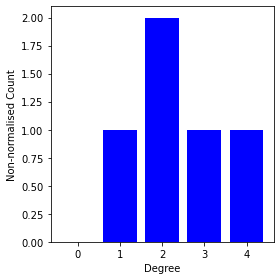

In [213]:
# Plot the degree distribution

import matplotlib.pyplot as plt

#%matplotlib inline

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('Non-normalised Count')
plt.xlabel('Degree')

# draw a bar plot/histogram
plt.bar(v_deg, h_deg, width = 0.8, color = 'b')  

# If you use log axes (for skewed distributions), it is better to plot dots instead
#plt.plot(v_deg, h_deg, 'b+')                     # or 'k+' 

plt.show()


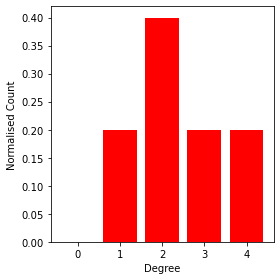

In [214]:
# Normalise the degree distribution by the total number of nodes (to get the probability distribution) and then plot

N = nx.number_of_nodes(Q)
h_deg_n = [x / N for x in h_deg]

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

plt.bar(v_deg, h_deg_n, width = 0.8, color = 'r')

plt.show()


<h3><b>Exercise 4:</b> Degree Distribution</h3>

- Make a normalised histogram of the network you have just created (data from slides - week 2)
- Visualise the histogram
- Calculate the average degree and the average weighted-degree of your network


<k>: 2.0
<s>: 7.6


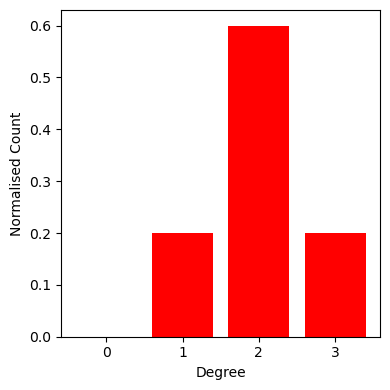

In [32]:
# Solution

import matplotlib.pyplot as plt

# Create a simple network
Q = nx.Graph()

source = [1, 1, 3, 4, 5, 5]
destination = [2, 3, 5, 1, 3, 4]
weights = [9.1, 1, 5, 2.5, 3, 3.4]

i = 0
while i < len(source):
    Q.add_edge(source[i], destination[i], weight=weights[i])
    i += 1    # the same as i = i + 1 

# calculate the number of nodes in the network
N = nx.number_of_nodes(Q)

# calculate the average degree
k_list = [value for (node_id, value) in nx.degree(Q)]
print('<k>:', sum(k_list) / N )

# calculate the average weighted-degree/strength
k_list_w = [value2 for (node_id, value2) in nx.degree(Q, weight='weight')]
print('<s>:', sum(k_list_w) / N )

# Returns a list of the number of nodes "h(k)" with a certain degree "k"
h_deg = nx.degree_histogram(Q)

# Creates a list of degree values (from 0 to the size of h_deg) for plotting
v_deg = list( range(0, len(h_deg)) )

h_deg_n = [x / N for x in h_deg]

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

plt.bar(v_deg, h_deg_n, width = 0.8, color = 'r')

plt.show()


<h3>2.5. Degree and pandas</h3>

In [216]:
# Using pandas, you can convert the degrees of a graph into a column of a dataframe

import networkx as nx
import pandas as pd

# Create a simple network
Q = nx.Graph()

source = [1, 1, 3, 4, 5, 5]
destination = [2, 3, 5, 1, 3, 4]

i = 0
while i < len(source):
    Q.add_edge(source[i], destination[i])
    i += 1    # the same as i = i + 1 

# convert the degrees of graph Q into a column of the dataframe
df0 = pd.DataFrame( nx.degree(Q), columns = ['node','degree'] )

print(df0)


   node  degree
0     1       3
1     2       1
2     3       2
3     5       2
4     4       2


In [217]:
# Make column 0 (named 'node'), that corresponds to the id of nodes, the index of the rows of the dataframe

# set the values in the column "node" as the index of the dataframe
df0 = df0.set_index('node')

print(df0)


      degree
node        
1          3
2          1
3          2
5          2
4          2


In [218]:
# Calculate the average degree using a pandas dataframe

# use the method "mean" Ps: .2f only indicates that this is a float number with 2 decimal digits
print('using pandas - <k> : %.2f' % df0.mean())

# compare with using list comprehension
k = [value for (node_id, value) in nx.degree(Q)]
print('using list comprehension - <k> : %.2f' % (sum(k) / nx.number_of_nodes(Q)) )


using pandas - <k> : 2.00
using list comprehension - <k> : 2.00


In [219]:
# alternative method to calculate average degree. specify which column will be used to calculate the mean

print('using pandas - <k> : %.2f' % df0.iloc[:,0].mean(axis = 0) )


using pandas - <k> : 2.00


<h3>2.6. Visualise a network</h3>


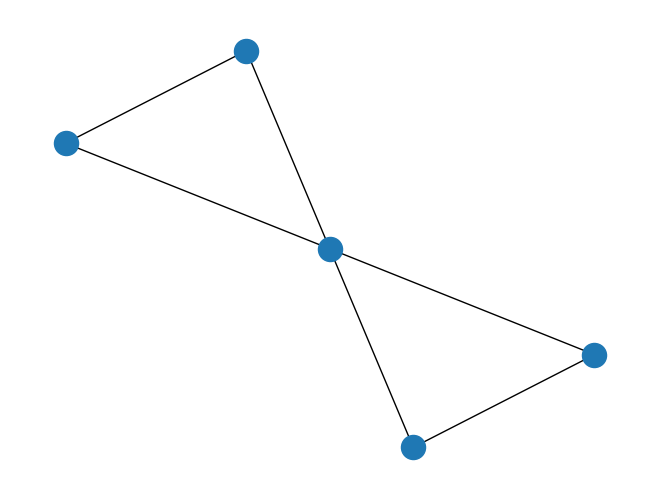

In [37]:
# This is simple network visualisation using Python
# There are dedicated software to visualise networks that are much better than this routine
# We will learn and use Gephi software for visualisation within a few weeks, but this routine is useful for small networks

import networkx as nx
import matplotlib.pyplot as plt

#%matplotlib inline

# Generate a network and add edges to the empty network
G = nx.Graph()
G.add_edges_from( [(0, 1), (5, 2), (1, 2), (1, 3), (1, 5), (0, 3)] )

# routine to draw a network
# pos = nx.spring_layout(G, iterations=300) -> this part uses an algorithm to generate the position of the nodes to minimise the overlap of links
# advice: generally speaking, avoid drawing the network with labels, unless for small networks, otherwise the visual gets too cluttered (i.e. polutted)
nx.draw(G, with_labels = False, pos = nx.spring_layout(G, iterations=300), node_size = 300)
#nx.draw(G, with_labels = True, pos = nx.spring_layout(G, iterations=200), node_color = range(G.number_of_nodes()), node_size=300)

# The method below is a shortcut to nx.draw(G, pos=nx.kamada_kawai_layout(G))
# kamada_kawai is an alternative to spring_layout to find the optimal position of nodes on space
# nx.draw_kamada_kawai(G)   

plt.savefig('./data/week2_mygraph2.pdf', bbox_inches='tight', format='pdf', dpi = 300)

#plt.show()

# 16.02.2021: Do not worry about a few warning messages that might show up when you run the method ".draw".
# 21.02.2022: I had to update the package "decorator" via Anaconda environment, otherwise, I got some error messages here


<h3><b>Exercise 5:</b> Simple network visualisation</h3>

- Visualise the network that you have just created


<h1>15 min break! </h1>

<h2></b>(1:30-2:45h) Part 2 </b></h2>

<h2><b>3.</b> (1:30-2:45h) Get your hands dirty</h2>
<h3> Comparing Networks</h3>

<ul>
    <li> Go to: https://users.ugent.be/~lcorread/courses/UFU/ </li>
    <ul>
        <li> original data sets from http://networksciencebook.com/translations/en/resources/data.html </li>
    </ul>
    <li> Download 3 data sets </li>
    <ul>
        <li> Email: Email network based on traffic data collected for 112 days at University of Kiel, Germany. Each node is an email address, and there is a directed link from node A to node B, if A sent at least one email to B. Ref: Ebel, H., Mielsch, L. I., & Bornholdt, S. (2002). Scale-free topology of e-mail networks. Physical review E, 66(3), 035103. </li>
        <li> Phone: Nodes represent a sample of cell phone users, they are connected if they have called each other at least once during the observed period. Data set contains a subset of most active users from Ref: Song, C., Qu, Z., Blumm, N., & Barabasi, A. L. (2010). Limits of predictability in human mobility. Science, 327(5968), 1018-1021 </li>
        <li> Collaboration: Scientific collaboration network based on the arXiv preprint archive's. Each node represents an author, and two nodes are connected if they co-authored at least one paper in the dataset. Ref: Leskovec, J., Kleinberg, J., & Faloutsos, C. (2007). Graph evolution: Densification and shrinking diameters. ACM Transactions on Knowledge Discovery from Data (TKDD), 1(1), 2. </li>
        <li> Ps: Nodes are labelled from 0 continuously. Each line contains two node labels A and B, representing either a directed link A->B or an undirected link A-B. Undirected links appear only once in the file.</li>
    </ul>
</ul>

<h3>Proposed Analysis</h3>

<ul>
    <li> Basic analysis </li>
    <ul>
        <li> Briefly describe the networks </li>
        <li> Briefly report the basic characteristics of the networks </li>
        <li> Make the analysis considering the undirected version of the network </li>
        <li> Visualise the degree distribution. Are there hubs? </li>
        <li> Can you plot a reference function to fit the degree distribution? </li>
        <li> Compare the structures of the 3 networks </li>
        <li> Compare them with the networks shown in the lecture (see lecture slides, week 2). Any similarities or differences in the structure? </li>
    </ul>
    <li> Meaning </li>
    <ul>
        <li> What is the meaning of the degree for each of these 3 networks? </li>
        <li> What does the degree tell you about the nodes? </li>
        <li> What do you understand about the low-degree nodes and the hubs? </li>
        <li> Think about potential correlations of node features/characteristics and node degree. What features would be interesting to correlate with the degree? In other words, would the degree be an indicator of some feature? </li>
        <li> ATTENTION: Do spend some time trying to understand the meaning of the degree for each network and what are the implications of the degree. This exercise will be important in the assignment </li>
        <li> Visualise the email network (smallest). Can you see interesting patterns of connections? </li>
    </ul>
    <li> Advanced analysis </li>
    <ul>
        <li> Are the networks direct or undirect? </li>
        <li> Can you see differences in the measures by using the directed vs undirected versions of the networks? </li>
        <li> Read the documentation of networkX online for methods/functions to calculate in-degree, out-degree, etc... </li>
        <li> Make a scatter plot of the correlation between in-degree and out-degree of nodes. What is the meaning of the result? </li>
        <li> Make a plot of the degree of a node vs the average degree of its neighbours. Is there assortativity? </li>
    </ul>
</ul>


no. nodes:  448817
no. edges:  4684881
avg. degree: 20.8766


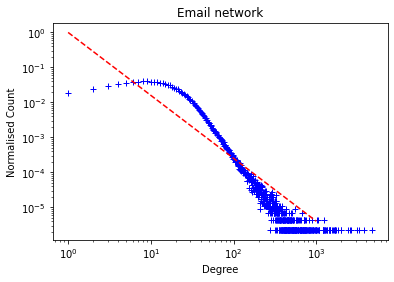

In [13]:
# Solution

# the email network is small (relatively few nodes)
# collaboration is a bit larger
# phone calls is a bit larger
# citation is large
# actors is very large

import networkx as nx
import matplotlib.pyplot as plt

# First read the network from file - this format is edge list
#G = nx.read_weighted_edgelist('./data/week2_citation.edgelist.txt', comments = '#', nodetype = int, delimiter=',')#, encoding='utf-8')
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', nodetype = int, delimiter=' ')#, encoding='utf-8')

# REMOVE MULTIPLE EDGES AND SELF-LOOPS

G = nx.Graph(G)                                 # Remove multiple edges
G.remove_edges_from( nx.selfloop_edges(G) )     # Remove self-loops
#nx.is_directed(G)                              # Check if the network is directed *Attention: The result is always negative, why?  Because few rows above, I created an undirected graph object! For directed network, create a directed graph object using DiGraph...

# print network size
N = nx.number_of_nodes(G)
E = nx.number_of_edges(G)
print('no. nodes: ', N)
print('no. edges: ', E)

# calculate the average degree
k_list = [val for (node, val) in nx.degree(G)]  # make a list "k_list" of degrees for all nodes
print('avg. degree: %.4f'% (sum(k_list)/N) )    # calculate the average degree of the network

# Make the histogram of degree, i.e. the number of nodes with a certain degree
h_deg = nx.degree_histogram(G)       # calculate the degree histogram
h_deg_n = [x / N for x in h_deg]     # normalise the histogram to make a pdf
v_deg = list( range(0,len(h_deg) ))  # create a list of degree values, from 0 to len(h_deg)

# Draw the histogram, using log-scale on the axes (why? try without log-scale)
plt.title('Email network')
plt.ylabel('Normalised Count')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')
#plt.bar(v_deg, h_deg_n, width=0.8, color='b')  # this plot using "bars", but "bars" are not good when using log-scale in the axes - DO NOT USE IT UNLESS THE HISTOGRAM IS SMALL!
plt.plot(v_deg, h_deg_n, 'b+')

# Draw an eye-guide curve. In this case a power-law with exponent 1.8
list_x = list( range(1,1000) )                    # Create the values for the x-axis and convert to a list
list_y = list( [ 1/(i**1.8) for i in list_x ] )   # Create the values for the y-axis and convert to a list:
                                                  # this code is called "list comprehension" [ 1/(i**1.8) for i in list_x ] -> for each item "i" in the list "list_x", the output is "1/(i**1.8)"
plt.plot(list_x, list_y, 'r--')

plt.show()


In [ ]:
# Solution

# tip: Analyse in-degree vs. out-degree distributions

import networkx as np

G.clear()

G = nx.read_weighted_edgelist('./data/week2_citation.edgelist.txt', comments = '#', create_using=nx.DiGraph(), nodetype = int, delimiter=',')#, encoding='utf-8')

# generates a list of in-degree
k_in = [val for (node, val) in G.in_degree()]

# generates a list of out-degree
k_out = [val for (node, val) in G.out_degree()]

# Try to plot the in-degree vs the out-degree distributions and compare. Any differences?
